In [192]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import datetime
from cartopy import crs as ccrs, feature as cfeature
import matplotlib.patches as mpatches
from math import radians, sin, cos, sqrt, atan2

import numpy as np
import os

## Toulouse

In [193]:
df = pd.read_csv('pos_table_1433801924.csv')
df = df.drop(df.columns[0], axis=1)
df.dropna(subset=["lat"], inplace=True)
df.dropna(subset=["lon"], inplace=True)
df.dropna(subset=["lat"], inplace=True)

df

,rawmsg,mintime,maxtime,msgcount,icao24,nicsuppla,hcr,nic,survstatus,nicsupplb,...,nicsupplc,groundspeed,gsresolution,heading,timeflag,surface,hour,serial,mintime.1,maxtime.1
10,8d4079cc58c906dcc898cf2685c0,1.672531e+09,1.672531e+09,2,4079cc,False,185.2,9,0,False,...,False,NaN,NaN,NaN,False,False,1672531200,1433801924,1.672531e+09,1.672531e+09
11,8d4079cc58c906dcc898cf2685c0,1.672531e+09,1.672531e+09,2,4079cc,False,185.2,9,0,False,...,False,NaN,NaN,NaN,False,False,1672531200,1433801924,1.672531e+09,1.672531e+09
16,8d4079cc58c90351289c4d169bd2,1.672531e+09,1.672531e+09,2,4079cc,False,185.2,9,0,False,...,False,NaN,NaN,NaN,False,False,1672531200,1433801924,1.672531e+09,1.672531e+09
17,8d4079cc58c90351289c4d169bd2,1.672531e+09,1.672531e+09,2,4079cc,False,185.2,9,0,False,...,False,NaN,NaN,NaN,False,False,1672531200,1433801924,1.672531e+09,1.672531e+09
18,8d4005bd58bf0460506b3d7cda1b,1.672531e+09,1.672531e+09,1,4005bd,False,185.2,9,0,False,...,False,NaN,NaN,NaN,False,False,1672531200,1433801924,1.672531e+09,1.672531e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797091,8d4cafc358bf038b9e6e2a8a96f1,1.672696e+09,1.672696e+09,1,4cafc3,False,185.2,9,0,False,...,False,NaN,NaN,NaN,False,False,1672693200,1433801924,1.672696e+09,1.672696e+09
1797092,8d4cafc358bf038b9e6e2a8a96f1,1.672696e+09,1.672696e+09,1,4cafc3,False,185.2,9,0,False,...,False,NaN,NaN,NaN,False,False,1672693200,1433801924,1.672696e+09,1.672696e+09
1797093,8d4d2238589d317f749fa25caa42,1.672696e+09,1.672696e+09,1,4d2238,False,185.2,9,0,False,...,False,NaN,NaN,NaN,False,False,1672693200,1433801924,1.672696e+09,1.672696e+09
1797094,8d3950d16079052beebbfa96af34,1.672696e+09,1.672696e+09,1,3950d1,False,370.4,7,0,False,...,False,NaN,NaN,NaN,False,False,1672693200,1433801924,1.672696e+09,1.672696e+09


In [194]:
df_grouped = df.groupby('icao24', group_keys=True).apply(lambda x: x)
df_grouped['updateinterval'] = df_grouped['mintime.1'].diff()

df_grouped = df_grouped[(df_grouped['updateinterval'] > 0.01) & (df_grouped['updateinterval'] < 10)]

df = df_grouped.reset_index(drop=True)
df

,rawmsg,mintime,maxtime,msgcount,icao24,nicsuppla,hcr,nic,survstatus,nicsupplb,...,groundspeed,gsresolution,heading,timeflag,surface,hour,serial,mintime.1,maxtime.1,updateinterval
0,8d0100f658b98375a8b40be3a947,1.672667e+09,1.672667e+09,2,0100f6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672664400,1433801924,1.672667e+09,1.672667e+09,0.024
1,8d0100f658b987006cb0363a1b63,1.672667e+09,1.672667e+09,1,0100f6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672664400,1433801924,1.672667e+09,1.672667e+09,1.037
2,8d0100f658b9837580b4643595fe,1.672667e+09,1.672667e+09,2,0100f6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672664400,1433801924,1.672667e+09,1.672667e+09,1.113
3,8d0100f658b9837580b4643595fe,1.672667e+09,1.672667e+09,2,0100f6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672664400,1433801924,1.672667e+09,1.672667e+09,0.081
4,8d0100f658b9870044b08de87a94,1.672667e+09,1.672667e+09,1,0100f6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672664400,1433801924,1.672667e+09,1.672667e+09,1.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311975,8de491c658dd34fdd89ff7b817ad,1.672649e+09,1.672649e+09,1,e491c6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672646400,1433801924,1.672649e+09,1.672649e+09,0.088
1311976,8de491c658dd617be2a40be89b1e,1.672649e+09,1.672649e+09,2,e491c6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672646400,1433801924,1.672649e+09,1.672649e+09,0.825
1311977,8de491c658dd617be2a40be89b1e,1.672649e+09,1.672649e+09,1,e491c6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672646400,1433801924,1.672649e+09,1.672649e+09,0.047
1311978,8de491c658dd417c1aa43232f3a4,1.672649e+09,1.672649e+09,1,e491c6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672646400,1433801924,1.672649e+09,1.672649e+09,0.838


In [195]:
def categorize_update_interval(all_update_interval):
    result_dict = {}

    for num in all_update_interval:
        rounded_value = round(num, 1)
        if rounded_value not in result_dict:
            result_dict[rounded_value] = 0
        result_dict[rounded_value] += 1

    result_dict = dict(sorted(result_dict.items()))

    return result_dict

In [196]:
icao24 = list(df['icao24'].unique())

diff_all = []

for ic in icao24:
    df_loc = df[df['icao24'] == ic]

    df_loc.loc[:, 'updateinterval'] = df_loc.loc[:, 'mintime'].diff()

    df_loc = df_loc[df_loc['updateinterval'] > 0.01]
    
    diff = df_loc['updateinterval'].to_list()
    
    diff_all.extend(diff)

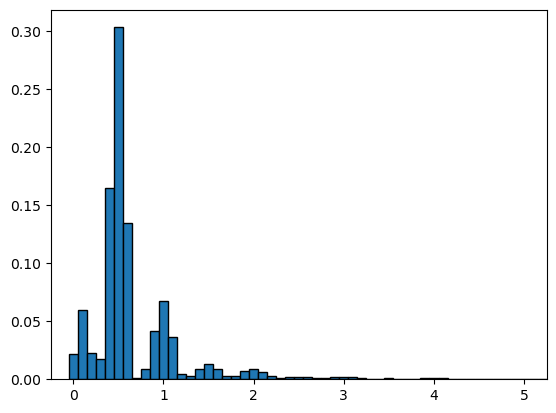

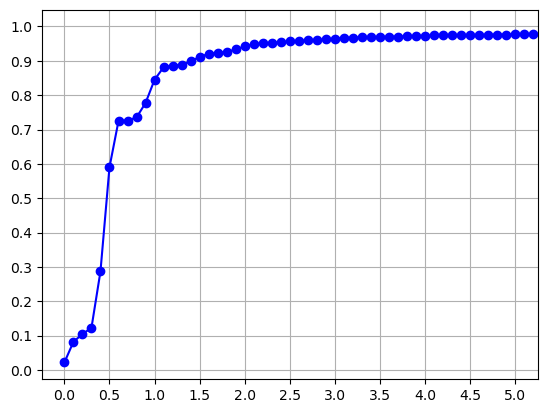

In [197]:
result = categorize_update_interval(diff_all)

x = list(result.keys())
y = list(result.values())
sum_y = sum(y)
    
y = np.array(y)/sum_y

cum_freq = {}

cum = 0

for i in range(len(result.keys())):
    cum += y[i]
    cum_freq[x[i]] = cum
    
sum_cum = sum(list(cum_freq.values()))

plt.bar(x, y, width=0.1, edgecolor='black')
plt.xlim([-0.25, 5.25])
plt.show()

plt.plot(cum_freq.keys(), cum_freq.values(), '-ob')
plt.xticks(np.arange(0, 10.5, 0.5))
plt.yticks(np.arange(0, 1.05, 0.1))
plt.grid(True)
plt.xlim([-0.25, 5.25])
plt.show()

## Range Effect

In [198]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat_receiver, lon_receiver):
    R = 6371.0  # radius of the Earth in km

    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat_receiver_rad = radians(lat_receiver)
    lon_receiver_rad = radians(lon_receiver)

    dlon = lon_receiver_rad - lon1_rad
    dlat = lat_receiver_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat_receiver_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance  # in km


lat_receiver = 43.57124934563629
lon_receiver = 1.4722830959048443

df['range_km'] = df.apply(lambda row: haversine(row['lat'], row['lon'], lat_receiver, lon_receiver), axis=1)

In [199]:
df_100 = df[(df['range_km'] > 0) & (df['range_km'] <= 100)]
df_200 = df[(df['range_km'] > 100) & (df['range_km'] <= 200)]
df_300 = df[(df['range_km'] > 200) & (df['range_km'] <= 300)]
df_400 = df[(df['range_km'] > 300) & (df['range_km'] <= 400)]

In [202]:
def get_histo(df):
    icao24 = list(df['icao24'].unique())

    diff_all = []

    for ic in icao24:
        df_loc = df[df['icao24'] == ic]

        df_loc.loc[:, 'updateinterval'] = df_loc.loc[:, 'mintime'].diff()

        df_loc = df_loc[df_loc['updateinterval'] > 0.01]

        diff = df_loc['updateinterval'].to_list()

        diff_all.extend(diff)

    result = categorize_update_interval(diff_all)

    x = list(result.keys())
    y = list(result.values())
    sum_y = sum(y)

    y = np.array(y)/sum_y

    cum_freq = {}

    cum = 0

    for i in range(len(result.keys())):
        cum += y[i]
        cum_freq[x[i]] = cum

    sum_cum = sum(list(cum_freq.values()))
    
    return result, cum_freq

In [203]:
freq = []
cum_freq = []

data = [df_100, df_200, df_300, df_400]

for d in data:
    freq_, cum_freq_ = get_histo(d)
    freq.append(freq_)
    cum_freq.append(cum_freq_)

Text(0, 0.5, 'Frequency [%]')

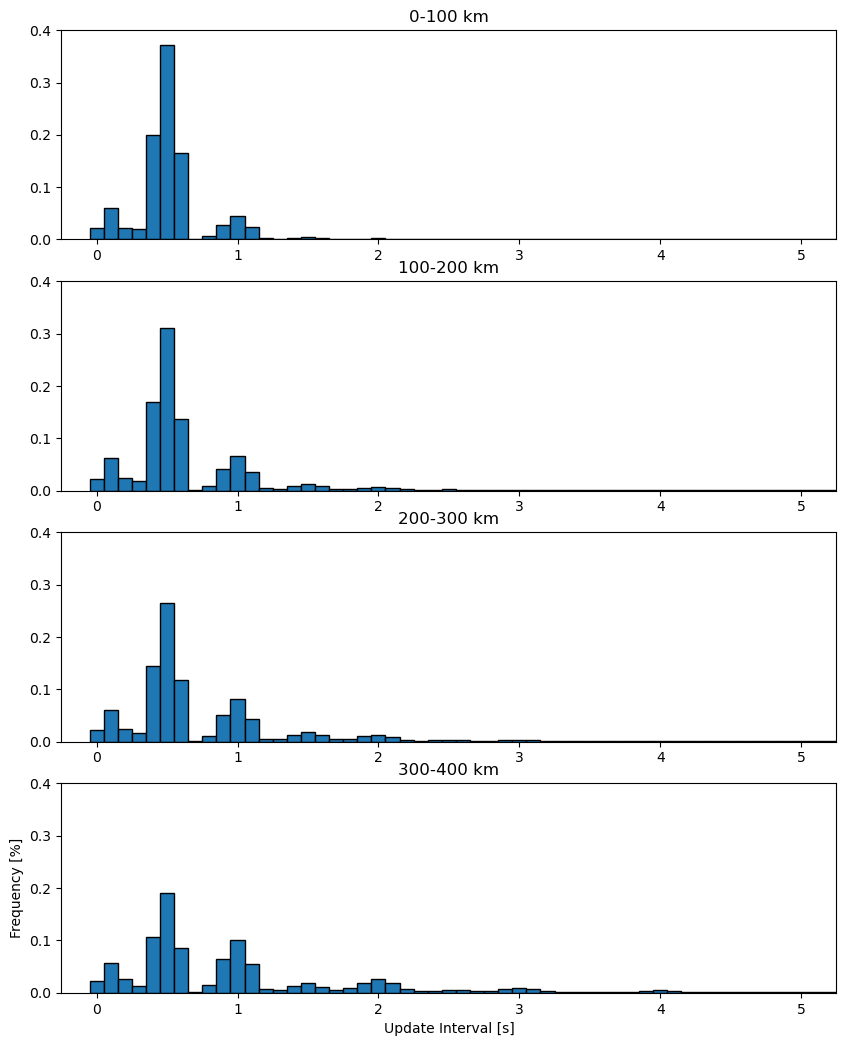

In [204]:
fig, axs = plt.subplots(4, 1, figsize=(10, 12.5))

for k in range(len(freq)):
    result = freq[k]
    x = list(result.keys())
    y = list(result.values())
    sum_y = sum(y)

    y = np.array(y)/sum_y

    cum_freq_ = {}

    cum = 0

    for i in range(len(result.keys())):
        cum += y[i]
        cum_freq_[x[i]] = cum

    sum_cum = sum(list(cum_freq_.values()))
    
    axs[k].bar(x, y, width=0.1, edgecolor='black')
    axs[k].set_xlim([-0.25, 5.25])
    axs[k].set_ylim([0, 0.4])
    axs[k].set_title('{}-{} km'.format(k*100, k*100+100))
    
axs[3].set_xlabel('Update Interval [s]')
axs[3].set_ylabel('Frequency [%]')
    


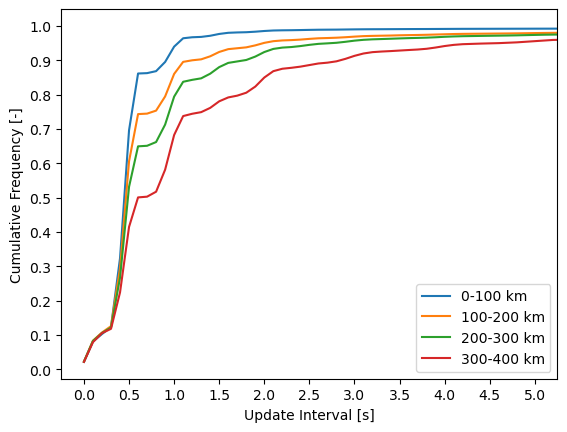

In [205]:
for cum in cum_freq:
    plt.plot(cum.keys(), cum.values(), '-')
    plt.xticks(np.arange(0, 10.5, 0.5))
    plt.yticks(np.arange(0, 1.05, 0.1))
#     plt.grid(True)
    plt.xlim([-0.25, 5.25])
    plt.xlabel('Update Interval [s]')
    plt.ylabel('Cumulative Frequency [-]')
#     plt.show()

plt.legend(['0-100 km', '100-200 km', '200-300 km', '300-400 km'])

## Gaussian mixture model

In [211]:
list_df = [df_100, df_200, df_300, df_400]

################ 0 ############
[[0.48757784]
 [0.98376071]
 [0.10355298]
 [1.65894282]
 [1.28392585]
 [3.96248506]
 [3.1051858 ]]
[5.51861202e-01 6.71966951e-02 3.47369299e-01 1.88920165e-03
 2.79648230e-02 3.19971788e-03 5.19061197e-04]


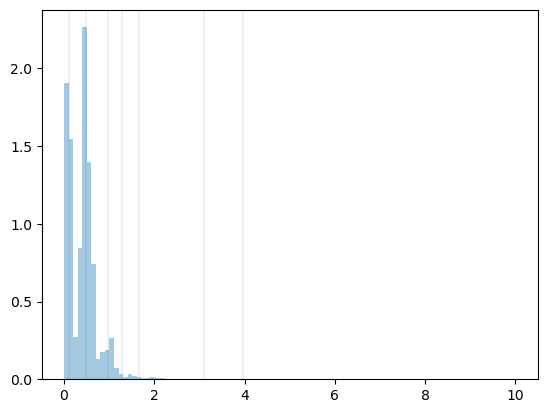

################ 1 ############
[[0.47948959]
 [0.10450915]
 [0.96179074]
 [1.79184218]
 [4.83806026]
 [2.55166295]
 [3.49781547]]
[0.4415144  0.35352446 0.15135139 0.02710844 0.01264237 0.01264381
 0.00121513]


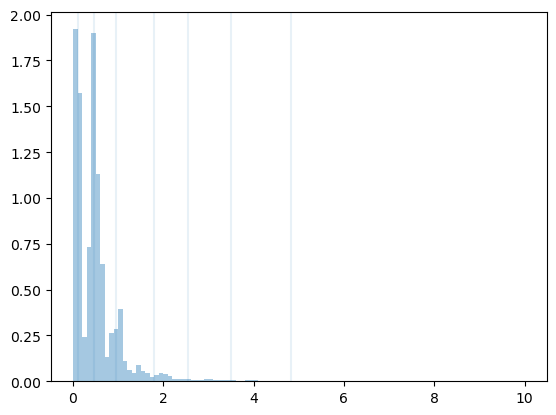

################ 2 ############
[[0.47341926]
 [0.89130248]
 [0.10391324]
 [1.93077273]
 [4.59461076]
 [2.77122073]
 [3.84108128]]
[0.31708496 0.26109473 0.34849709 0.03706944 0.01823622 0.01576768
 0.00224989]


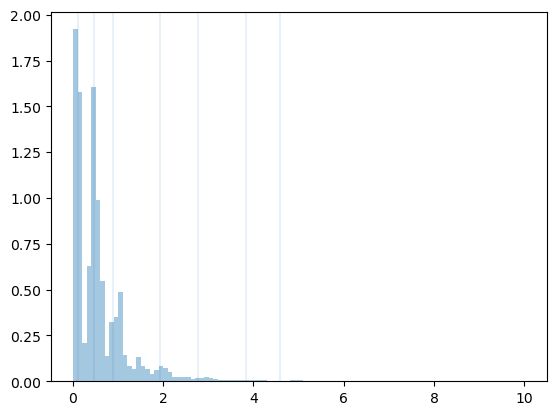

################ 3 ############
[[0.27508886]
 [1.04984179]
 [0.98988091]
 [1.85002389]
 [2.6933462 ]
 [3.53494376]
 [5.19758142]]
[0.63937194 0.03121557 0.16564635 0.07817946 0.02977976 0.02168664
 0.03412028]


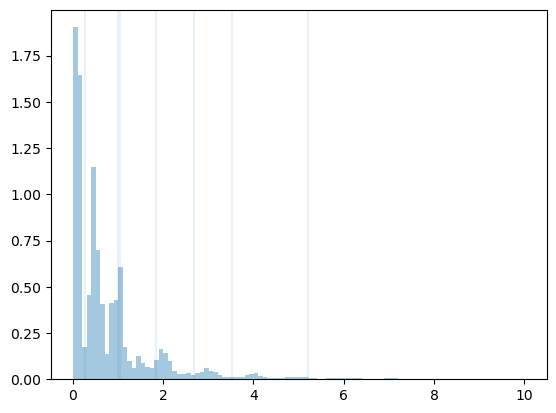

In [212]:
## from sklearn import mixture

all_means = []
all_weight = []
all_cov = []

for i in range(len(list_df)):
    data_1 = list_df[i]['updateinterval'].to_list()
    n_comp = 7
    init_means = [[0.5*(i+1)] for i in range(n_comp)]
    data_prob = np.concatenate((data_1, data_1))[:, np.newaxis]

    # # Fit a Gaussian Mixture Model with two components
    clf = mixture.GaussianMixture(n_components=n_comp, covariance_type='diag', means_init = init_means)
    clf.fit(data_prob)
    print('################ {} ############'.format(i))
    print(clf.means_)
    print(clf.weights_)

    all_weight.append(clf.weights_)
    all_means.append(clf.means_)

    plt.hist(data_1, 100, density=True, histtype='stepfilled', alpha=0.4);

    for i in range(len(clf.means_)):
        plt.axvline(clf.means_[i], alpha = 0.1)

    plt.show()

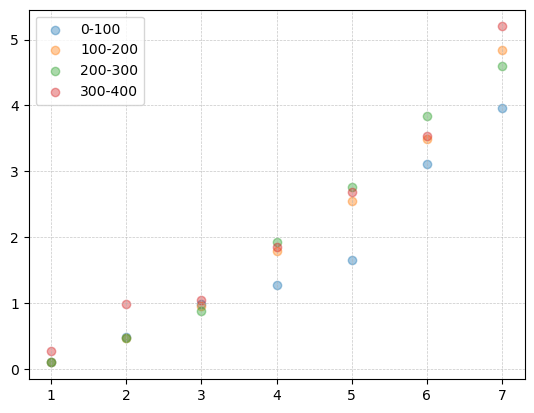

In [213]:
for mean in all_means:
    mean = sorted(mean)
    plt.scatter([i+1 for i in range(len(mean))], mean, alpha = 0.4)
    
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(x_ticks)

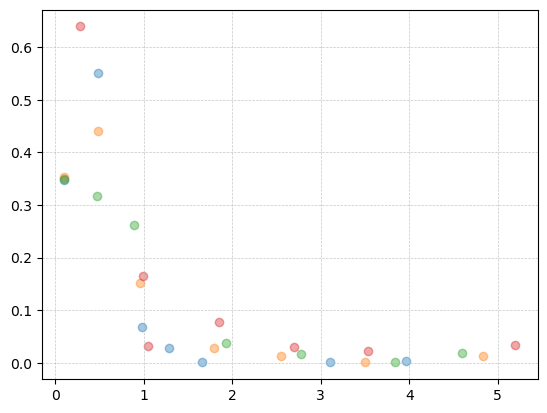

In [216]:
for i in range(4):
    plt.scatter(all_means[i], all_weight[i], alpha = 0.4)
    
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

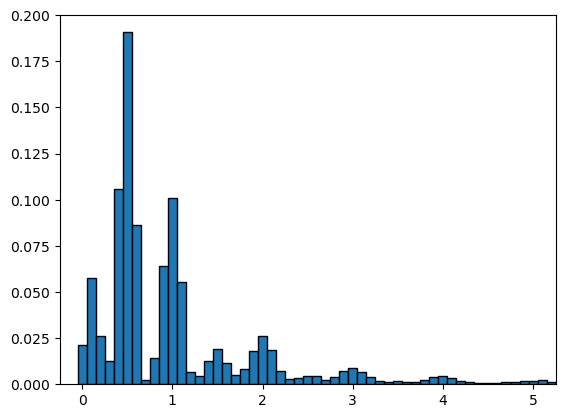

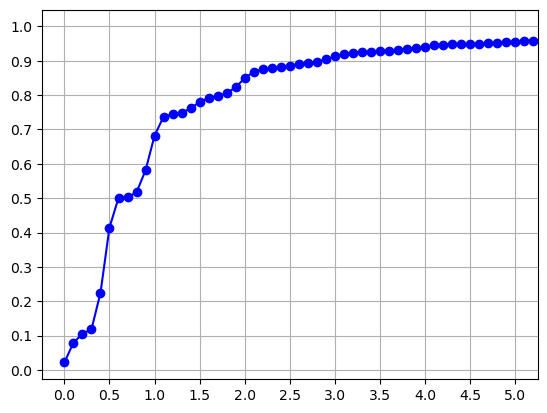

In [63]:
icao24 = list(df_400['icao24'].unique())

diff_all = []

for ic in icao24:
    df_loc = df_400[df_400['icao24'] == ic]

    df_loc.loc[:, 'updateinterval'] = df_loc.loc[:, 'mintime'].diff()

    df_loc = df_loc[df_loc['updateinterval'] > 0.01]
    
    diff = df_loc['updateinterval'].to_list()
    
    diff_all.extend(diff)
    
result = categorize_update_interval(diff_all)

x = list(result.keys())
y = list(result.values())
sum_y = sum(y)
    
y = np.array(y)/sum_y

cum_freq = {}

cum = 0

for i in range(len(result.keys())):
    cum += y[i]
    cum_freq[x[i]] = cum
    
sum_cum = sum(list(cum_freq.values()))

plt.bar(x, y, width=0.1, edgecolor='black')
plt.xlim([-0.25, 5.25])
plt.show()

plt.plot(cum_freq.keys(), cum_freq.values(), '-ob')
plt.xticks(np.arange(0, 10.5, 0.5))
plt.yticks(np.arange(0, 1.05, 0.1))
plt.grid(True)
plt.xlim([-0.25, 5.25])
plt.show()

## Traffic

In [164]:
from datetime import datetime, timedelta

In [165]:
df = pd.read_csv('pos_table_1433801924.csv')
df = df.drop(df.columns[0], axis=1)
df.dropna(subset=["lat"], inplace=True)
df.dropna(subset=["lon"], inplace=True)
df.dropna(subset=["lat"], inplace=True)

df_grouped = df.groupby('icao24', group_keys=True).apply(lambda x: x)
df_grouped['updateinterval'] = df_grouped['mintime.1'].diff()

df_grouped = df_grouped[(df_grouped['updateinterval'] > 0.01) & (df_grouped['updateinterval'] < 10)]

df = df_grouped.reset_index(drop=True)
df

,rawmsg,mintime,maxtime,msgcount,icao24,nicsuppla,hcr,nic,survstatus,nicsupplb,...,groundspeed,gsresolution,heading,timeflag,surface,hour,serial,mintime.1,maxtime.1,updateinterval
0,8d0100f658b98375a8b40be3a947,1.672667e+09,1.672667e+09,2,0100f6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672664400,1433801924,1.672667e+09,1.672667e+09,0.024
1,8d0100f658b987006cb0363a1b63,1.672667e+09,1.672667e+09,1,0100f6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672664400,1433801924,1.672667e+09,1.672667e+09,1.037
2,8d0100f658b9837580b4643595fe,1.672667e+09,1.672667e+09,2,0100f6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672664400,1433801924,1.672667e+09,1.672667e+09,1.113
3,8d0100f658b9837580b4643595fe,1.672667e+09,1.672667e+09,2,0100f6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672664400,1433801924,1.672667e+09,1.672667e+09,0.081
4,8d0100f658b9870044b08de87a94,1.672667e+09,1.672667e+09,1,0100f6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672664400,1433801924,1.672667e+09,1.672667e+09,1.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311975,8de491c658dd34fdd89ff7b817ad,1.672649e+09,1.672649e+09,1,e491c6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672646400,1433801924,1.672649e+09,1.672649e+09,0.088
1311976,8de491c658dd617be2a40be89b1e,1.672649e+09,1.672649e+09,2,e491c6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672646400,1433801924,1.672649e+09,1.672649e+09,0.825
1311977,8de491c658dd617be2a40be89b1e,1.672649e+09,1.672649e+09,1,e491c6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672646400,1433801924,1.672649e+09,1.672649e+09,0.047
1311978,8de491c658dd417c1aa43232f3a4,1.672649e+09,1.672649e+09,1,e491c6,False,185.2,9,0,False,...,NaN,NaN,NaN,False,False,1672646400,1433801924,1.672649e+09,1.672649e+09,0.838


In [166]:
time_mid = '2023-01-01T00:00' #'%Y-%m-%dT%H:%M'
time_mid = datetime.strptime(time_mid, '%Y-%m-%dT%H:%M')
duration = 24 #hour
duration *= 60
interval = 10 #minutes

series_opensky = pd.date_range(start=(time_mid).strftime('%Y-%m-%d %H:%M:%S'),
                                end=(time_mid + timedelta(minutes=duration)).strftime('%Y-%m-%d %H:%M:%S'), freq="1min").strftime('%Y-%m-%d %H:%M:%S')

nb_data = len(series_opensky) - 1

traf = []
mean = []
med = []

for i in range(0, nb_data, interval):
        ts_start = pd.Timestamp(series_opensky[i], tz="utc").timestamp()
        ts_end = pd.Timestamp(series_opensky[i+1], tz="utc").timestamp()
        
        df_loc = df[(df['mintime.1'] > ts_start) & (df['mintime.1'] < ts_end)]
        
        icao = df_loc['icao24'].unique()
        traf.append(len(icao))
        
        updateinterval = np.array(df_loc['updateinterval'].to_list())
        med.append(np.median(updateinterval))
        mean.append(np.mean(updateinterval))
        
        

/Users/mfrahman/anaconda3/envs/traffic/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mfrahman/anaconda3/envs/traffic/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Average update interval [s]')

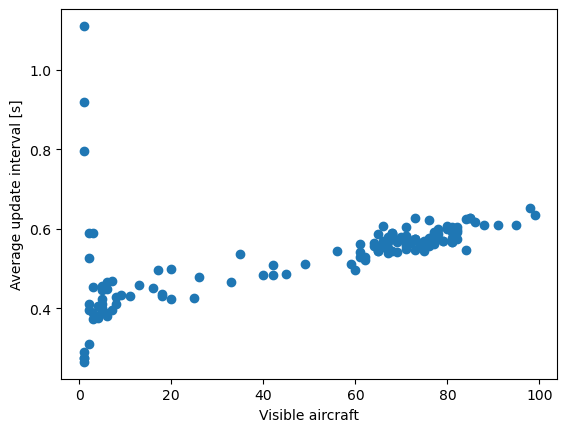

In [167]:
plt.scatter(traf, mean)
plt.xlabel('Visible aircraft')
plt.ylabel('Average update interval [s]')

Text(0, 0.5, 'Median update interval [s]')

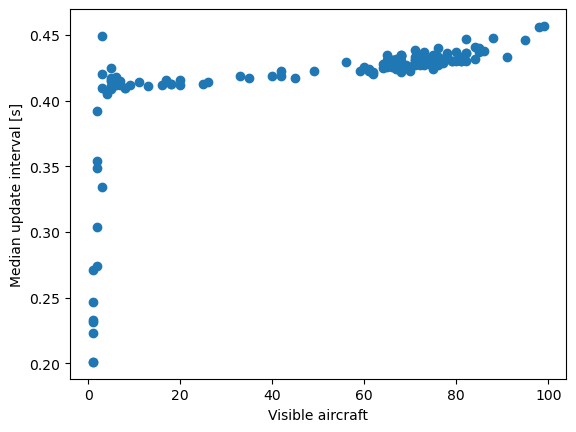

In [168]:
plt.scatter(traf, med)
plt.xlabel('Visible aircraft')
plt.ylabel('Median update interval [s]')

## Classify by number of AC
0-20, 20-40, 40-60, 60-80, 80-100

In [153]:
traf_dict = {}

for i in range(5):
    traf_dict['{}'.format(i*20+20)] = []
    
for i in range(0, nb_data, interval):
        ts_start = pd.Timestamp(series_opensky[i], tz="utc").timestamp()
        ts_end = pd.Timestamp(series_opensky[i+1], tz="utc").timestamp()
        
        df_loc = df[(df['mintime.1'] > ts_start) & (df['mintime.1'] < ts_end)]
        
        icao = df_loc['icao24'].unique()
        traf = len(icao)
        updateinterval = np.array(df_loc['updateinterval'].to_list())
        
#         print(traf)
        if(traf < 20):
            traf_dict['20'].extend(updateinterval)
        elif((traf >= 20) & (traf < 40)):
            traf_dict['40'].extend(updateinterval)
        elif((traf >= 40) & (traf < 60)):
            traf_dict['60'].extend(updateinterval)
        elif((traf >= 60) & (traf < 80)):
            traf_dict['80'].extend(updateinterval)
        elif((traf >= 80) & (traf < 100)):
            traf_dict['100'].extend(updateinterval)
        

In [141]:
def get_traf_upint_dist(diff_all):
    result = categorize_update_interval(diff_all)

    x = list(result.keys())
    y = list(result.values())
    sum_y = sum(y)

    y = np.array(y)/sum_y

    cum_freq = {}

    cum = 0

    for i in range(len(result.keys())):
        cum += y[i]
        cum_freq[x[i]] = cum

    sum_cum = sum(list(cum_freq.values()))
    
    return result, cum_freq

In [155]:
freq = []
cum_freq = []

for key in traf_dict.keys():
    freq_, cum_freq_ = get_traf_upint_dist(traf_dict[key])
    freq.append(freq_)
    cum_freq.append(cum_freq_)

Text(0, 0.5, 'Frequency [%]')

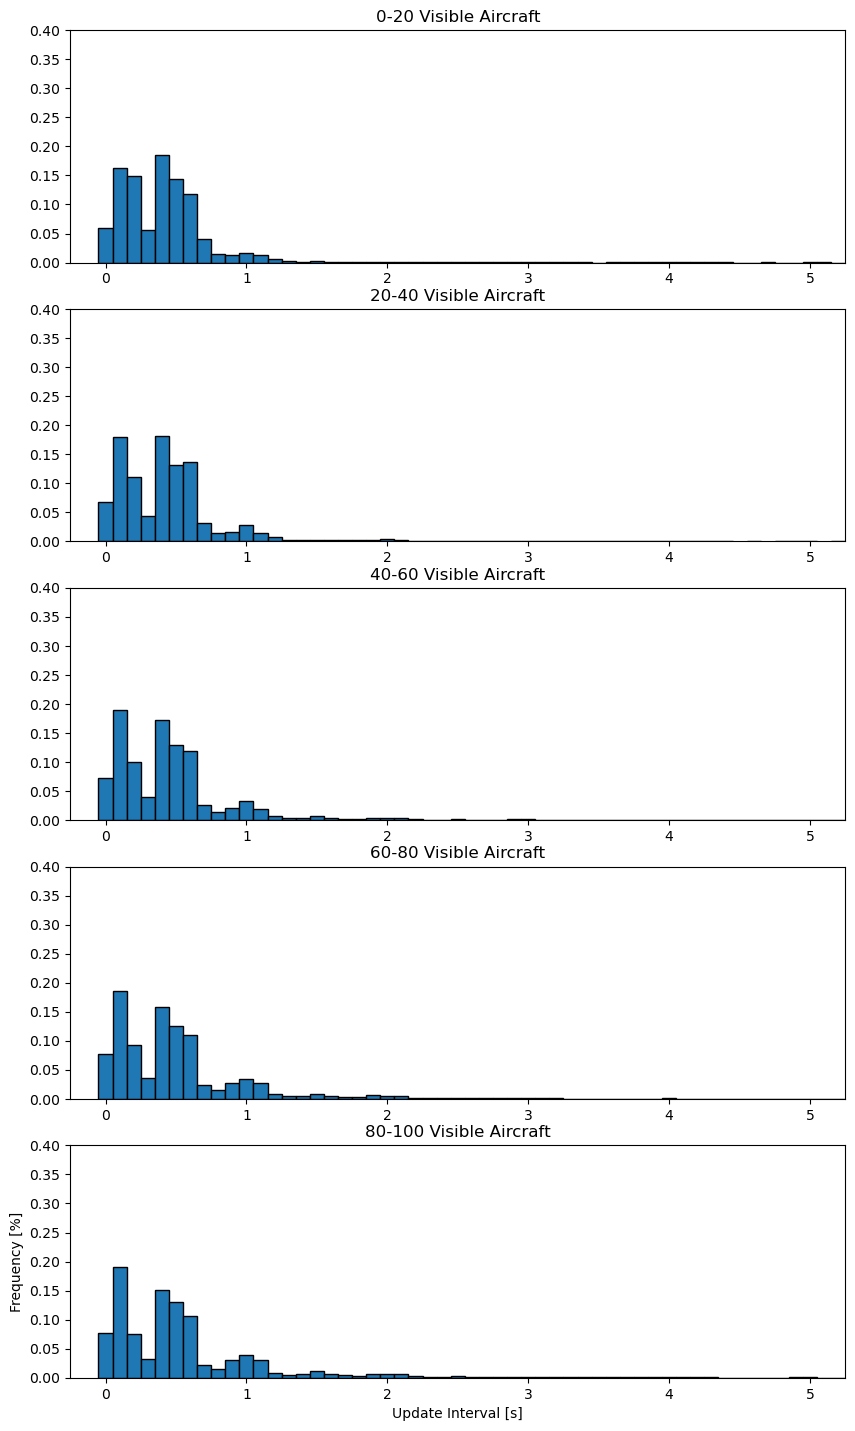

In [171]:
fig, axs = plt.subplots(5, 1, figsize=(10, 17.5))

for k in range(len(freq)):
    result = freq[k]
    x = list(result.keys())
    y = list(result.values())
    sum_y = sum(y)

    y = np.array(y)/sum_y

    cum_freq_ = {}

    cum = 0

    for i in range(len(result.keys())):
        cum += y[i]
        cum_freq_[x[i]] = cum

    sum_cum = sum(list(cum_freq_.values()))
    
    axs[k].bar(x, y, width=0.1, edgecolor='black')
    axs[k].set_xlim([-0.25, 5.25])
    axs[k].set_ylim([0, 0.4])
    axs[k].set_title('{}-{} Visible Aircraft'.format(k*20, k*20+20))
    
axs[-1].set_xlabel('Update Interval [s]')
axs[-1].set_ylabel('Frequency [%]')

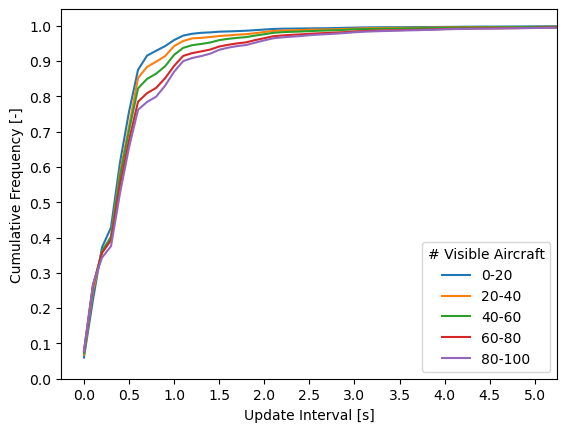

In [163]:
for cum in cum_freq:
    plt.plot(cum.keys(), cum.values(), '-')
    plt.xticks(np.arange(0, 10.5, 0.5))
    plt.yticks(np.arange(0, 1.05, 0.1))
#     plt.grid(True)
    plt.xlim([-0.25, 5.25])
    plt.xlabel('Update Interval [s]')
    plt.ylabel('Cumulative Frequency [-]')
#     plt.show()

plot_legend = ['{}-{}'.format(i*20, (i+1)*20) for i in range(len(cum_freq))]
plt.legend(plot_legend, title = '# Visible Aircraft')